# 오버워치 2 점수판 분석 AI

In [1]:
import pandas as pd
from os import path
import joblib

players = 10


def prepare_scoreboards(defeat_, victory_):
    scoreboards_ = pd.concat([defeat_, victory_])
    scoreboards_.set_index(
        pd.Index((i, j) for i in range(len(scoreboards_.index) // players) for j in range(players)), inplace=True
    )
    return scoreboards_


datapath = path.join('datasets', '')
range_ = range(3, 10)
defeat = pd.read_csv(datapath + 'defeat.csv', usecols=range_)
victory = pd.read_csv(datapath + 'victory.csv', usecols=range_)
scoreboards = prepare_scoreboards(defeat, victory)
d_max = scoreboards['D'].max()
joblib.dump(d_max, 'max.joblib')
scoreboards.loc[
    (
            scoreboards['E'] == 0
    ) & (
            scoreboards['A'] == 0
    ) & (
            scoreboards['D'] == 0
    ) & (
            scoreboards['DMG'] == 0
    ) & (
            scoreboards['H'] == 0
    ) & (
            scoreboards['MIT'] == 0
    ), 'D'
] = d_max
scoreboards

E  A   D   DMG     H   MIT    GAME
0   0  7  3   6  5933  1068  6199  DEFEAT
    1  7  0  10  3601   747     0  DEFEAT
    2  9  1   6  4352     0     0  DEFEAT
    3  7  7   2  2332  6325     0  DEFEAT
    4  6  4   2  3410  5979   606  DEFEAT
...   .. ..  ..   ...   ...   ...     ...
502 5  0  0   5  3863     0  2952  DEFEAT
    6  3  1   3  2456   517   488  DEFEAT
    7  1  0   5  2199     0     0  DEFEAT
    8  3  0   6  3338  3806     0  DEFEAT
    9  0  1   7  1020  2733   796  DEFEAT

[5030 rows x 7 columns]

In [2]:
scoreboards.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5030 entries, (0, 0) to (502, 9)
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   E       5030 non-null   int64 
 1   A       5030 non-null   int64 
 2   D       5030 non-null   int64 
 3   DMG     5030 non-null   int64 
 4   H       5030 non-null   int64 
 5   MIT     5030 non-null   int64 
 6   GAME    5030 non-null   object
dtypes: int64(6), object(1)
memory usage: 310.3+ KB


In [3]:
scoreboards.describe()

,E,A,D,DMG,H,MIT
count,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000
mean,13.743539,7.228032,6.411133,6197.787276,3830.944334,2398.827634
std,9.563460,8.123787,3.854115,4283.606606,5041.070001,4658.603333
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,4.000000,2758.500000,0.000000,0.000000
50%,13.000000,4.000000,6.000000,5530.000000,745.500000,365.500000
75%,20.000000,11.000000,9.000000,9068.500000,7423.250000,2019.000000
max,58.000000,54.000000,21.000000,26666.000000,27756.000000,41849.000000


In [4]:
import matplotlib as mpl
import os
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
IMAGES_PATH = path.join('.', 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('그림 저장:' + fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, dpi=resolution, format=fig_extension)

In [5]:
scoreboards

E  A   D   DMG     H   MIT    GAME
0   0  7  3   6  5933  1068  6199  DEFEAT
    1  7  0  10  3601   747     0  DEFEAT
    2  9  1   6  4352     0     0  DEFEAT
    3  7  7   2  2332  6325     0  DEFEAT
    4  6  4   2  3410  5979   606  DEFEAT
...   .. ..  ..   ...   ...   ...     ...
502 5  0  0   5  3863     0  2952  DEFEAT
    6  3  1   3  2456   517   488  DEFEAT
    7  1  0   5  2199     0     0  DEFEAT
    8  3  0   6  3338  3806     0  DEFEAT
    9  0  1   7  1020  2733   796  DEFEAT

[5030 rows x 7 columns]

In [6]:
tank = pd.concat([scoreboards[::players], scoreboards[5::players]])
damage = pd.concat([scoreboards[1::players], scoreboards[2::players], scoreboards[6::players], scoreboards[7::players]])
support = pd.concat(
    [scoreboards[3::players], scoreboards[4::players], scoreboards[8::players], scoreboards[9::players]]
)

In [7]:
tank.describe()

,E,A,D,DMG,H,MIT
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000
mean,17.723658,4.240557,6.119284,9043.682903,354.266402,9746.094433
std,10.180812,3.694259,3.695861,4102.483902,1071.280624,6098.661366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,3.000000,6049.250000,0.000000,5456.500000
50%,17.000000,3.000000,6.000000,8863.000000,0.000000,8550.000000
75%,24.000000,6.000000,8.000000,11651.250000,0.000000,12968.250000
max,58.000000,24.000000,21.000000,24682.000000,15168.000000,41849.000000


In [8]:
damage.describe()

,E,A,D,DMG,H,MIT
count,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000
mean,17.033797,1.883201,7.068091,8182.184891,343.293241,641.939861
std,9.198937,2.568171,4.085466,3656.680974,550.506204,1122.688493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,4.000000,5532.500000,0.000000,0.000000
50%,16.000000,1.000000,7.000000,7822.500000,3.000000,80.000000
75%,23.000000,3.000000,10.000000,10470.500000,517.000000,827.250000
max,52.000000,18.000000,21.000000,26666.000000,3353.000000,9682.000000


In [9]:
support.describe()

,E,A,D,DMG,H,MIT
count,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000
mean,8.463221,14.066600,5.900099,2790.441849,9056.934394,482.082008
std,6.756262,8.472763,3.590758,2120.716746,4139.126411,810.010253
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,8.000000,3.000000,1248.500000,6098.500000,0.000000
50%,7.000000,13.000000,6.000000,2465.500000,8619.500000,196.000000
75%,12.250000,19.000000,8.000000,3821.250000,11526.250000,615.000000
max,52.000000,54.000000,21.000000,16254.000000,27756.000000,7778.000000


그림 저장:tank_hist


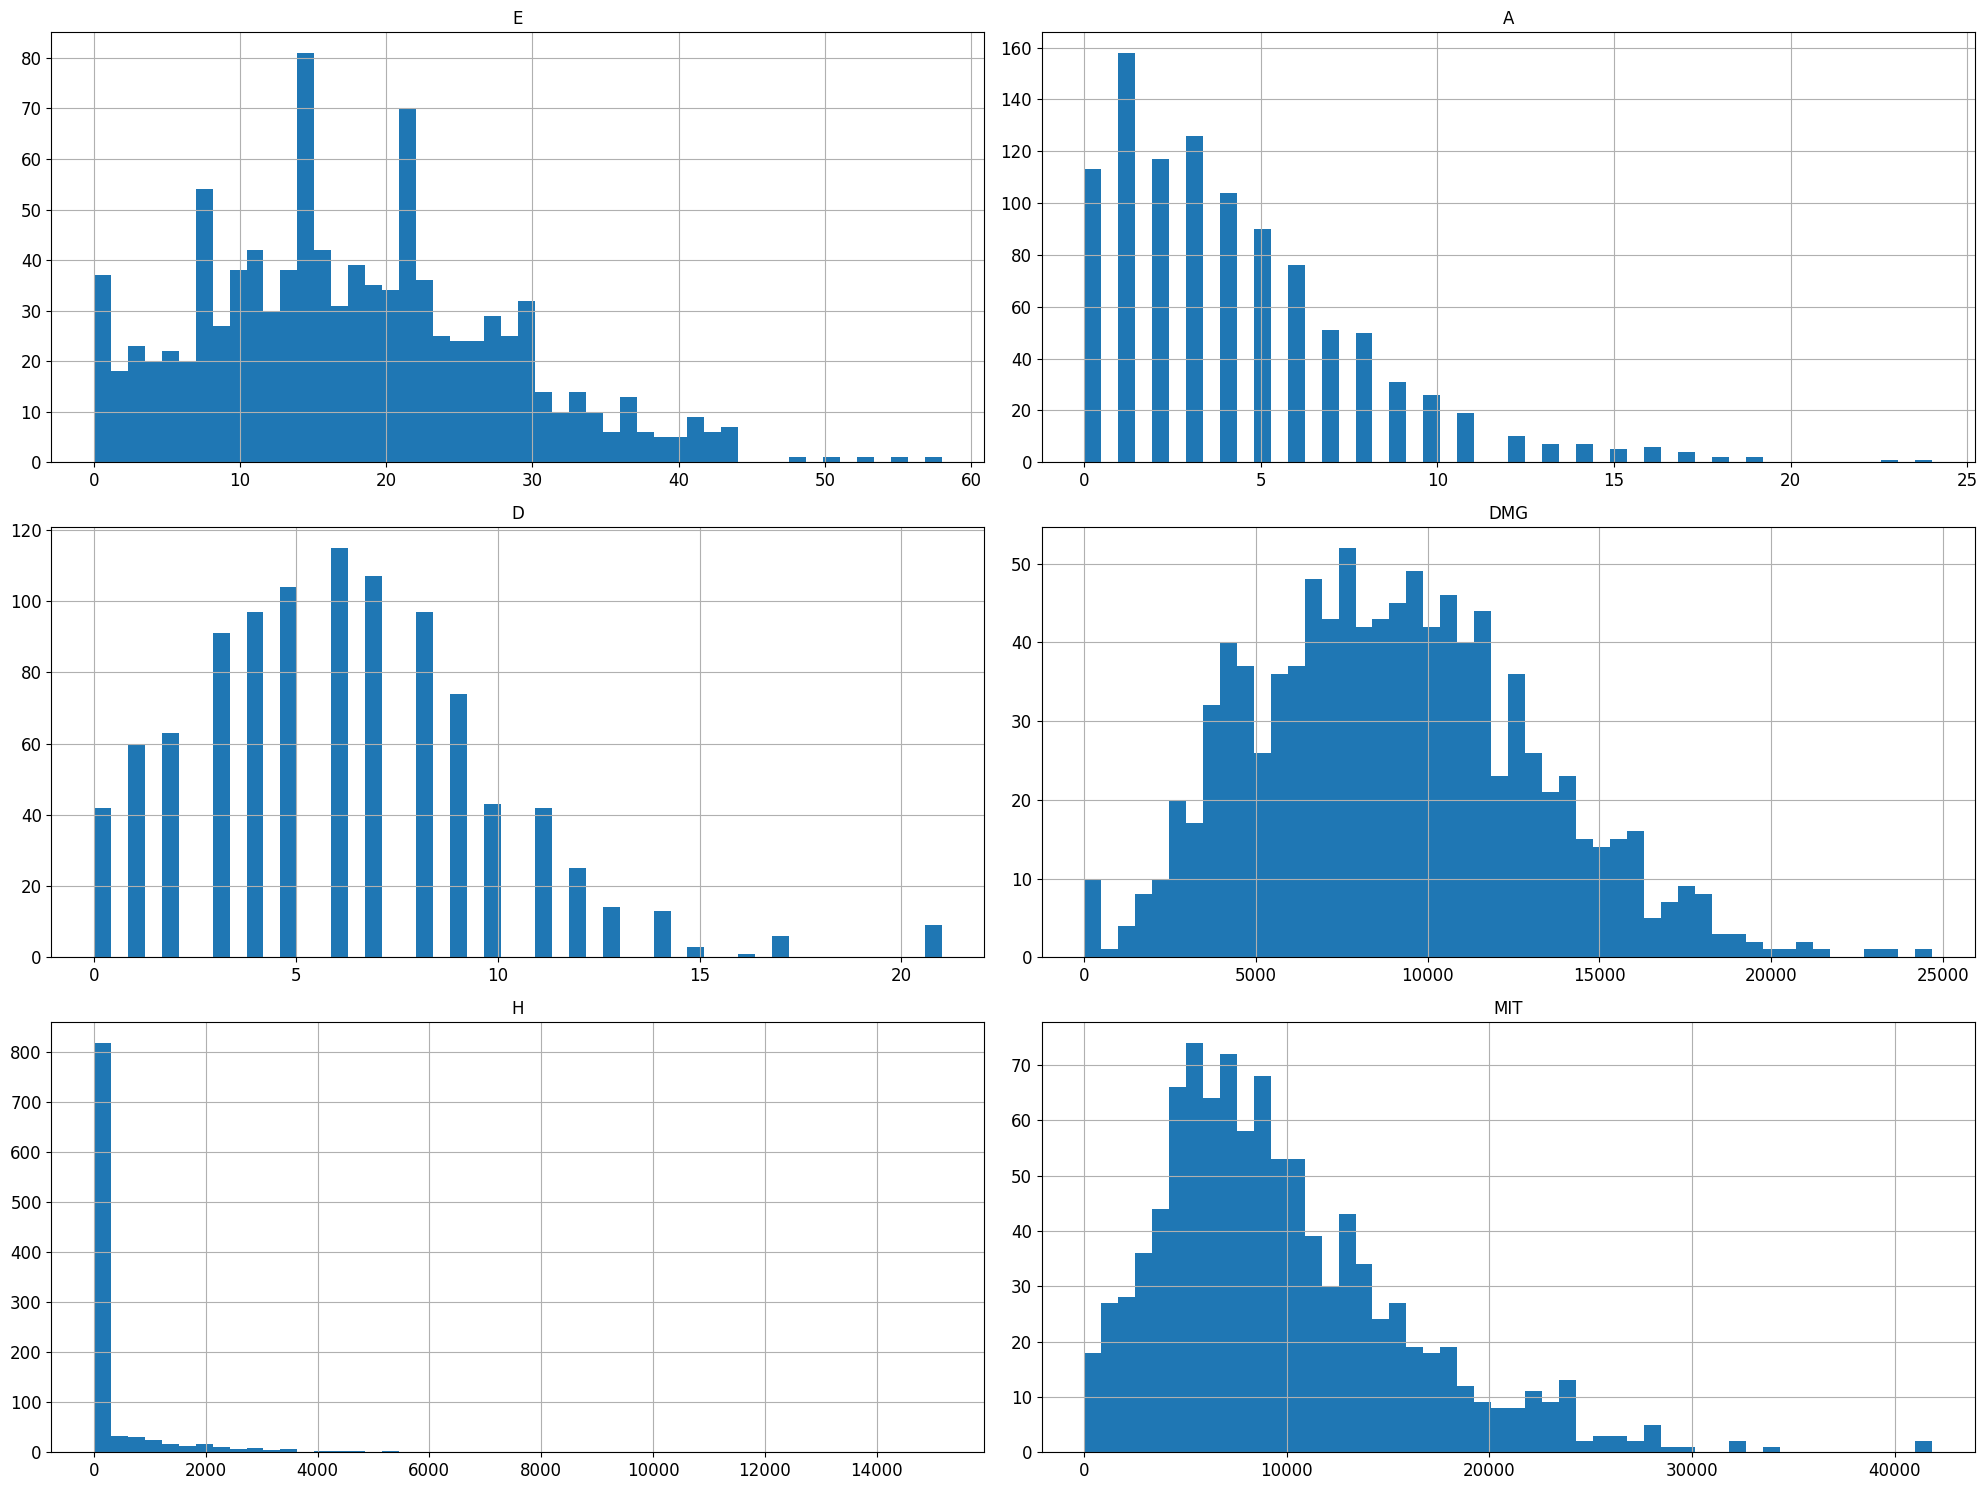

In [10]:
tank.hist(bins=50, figsize=(20, 15))
save_fig('tank_hist')
plt.show()

그림 저장:damage_hist


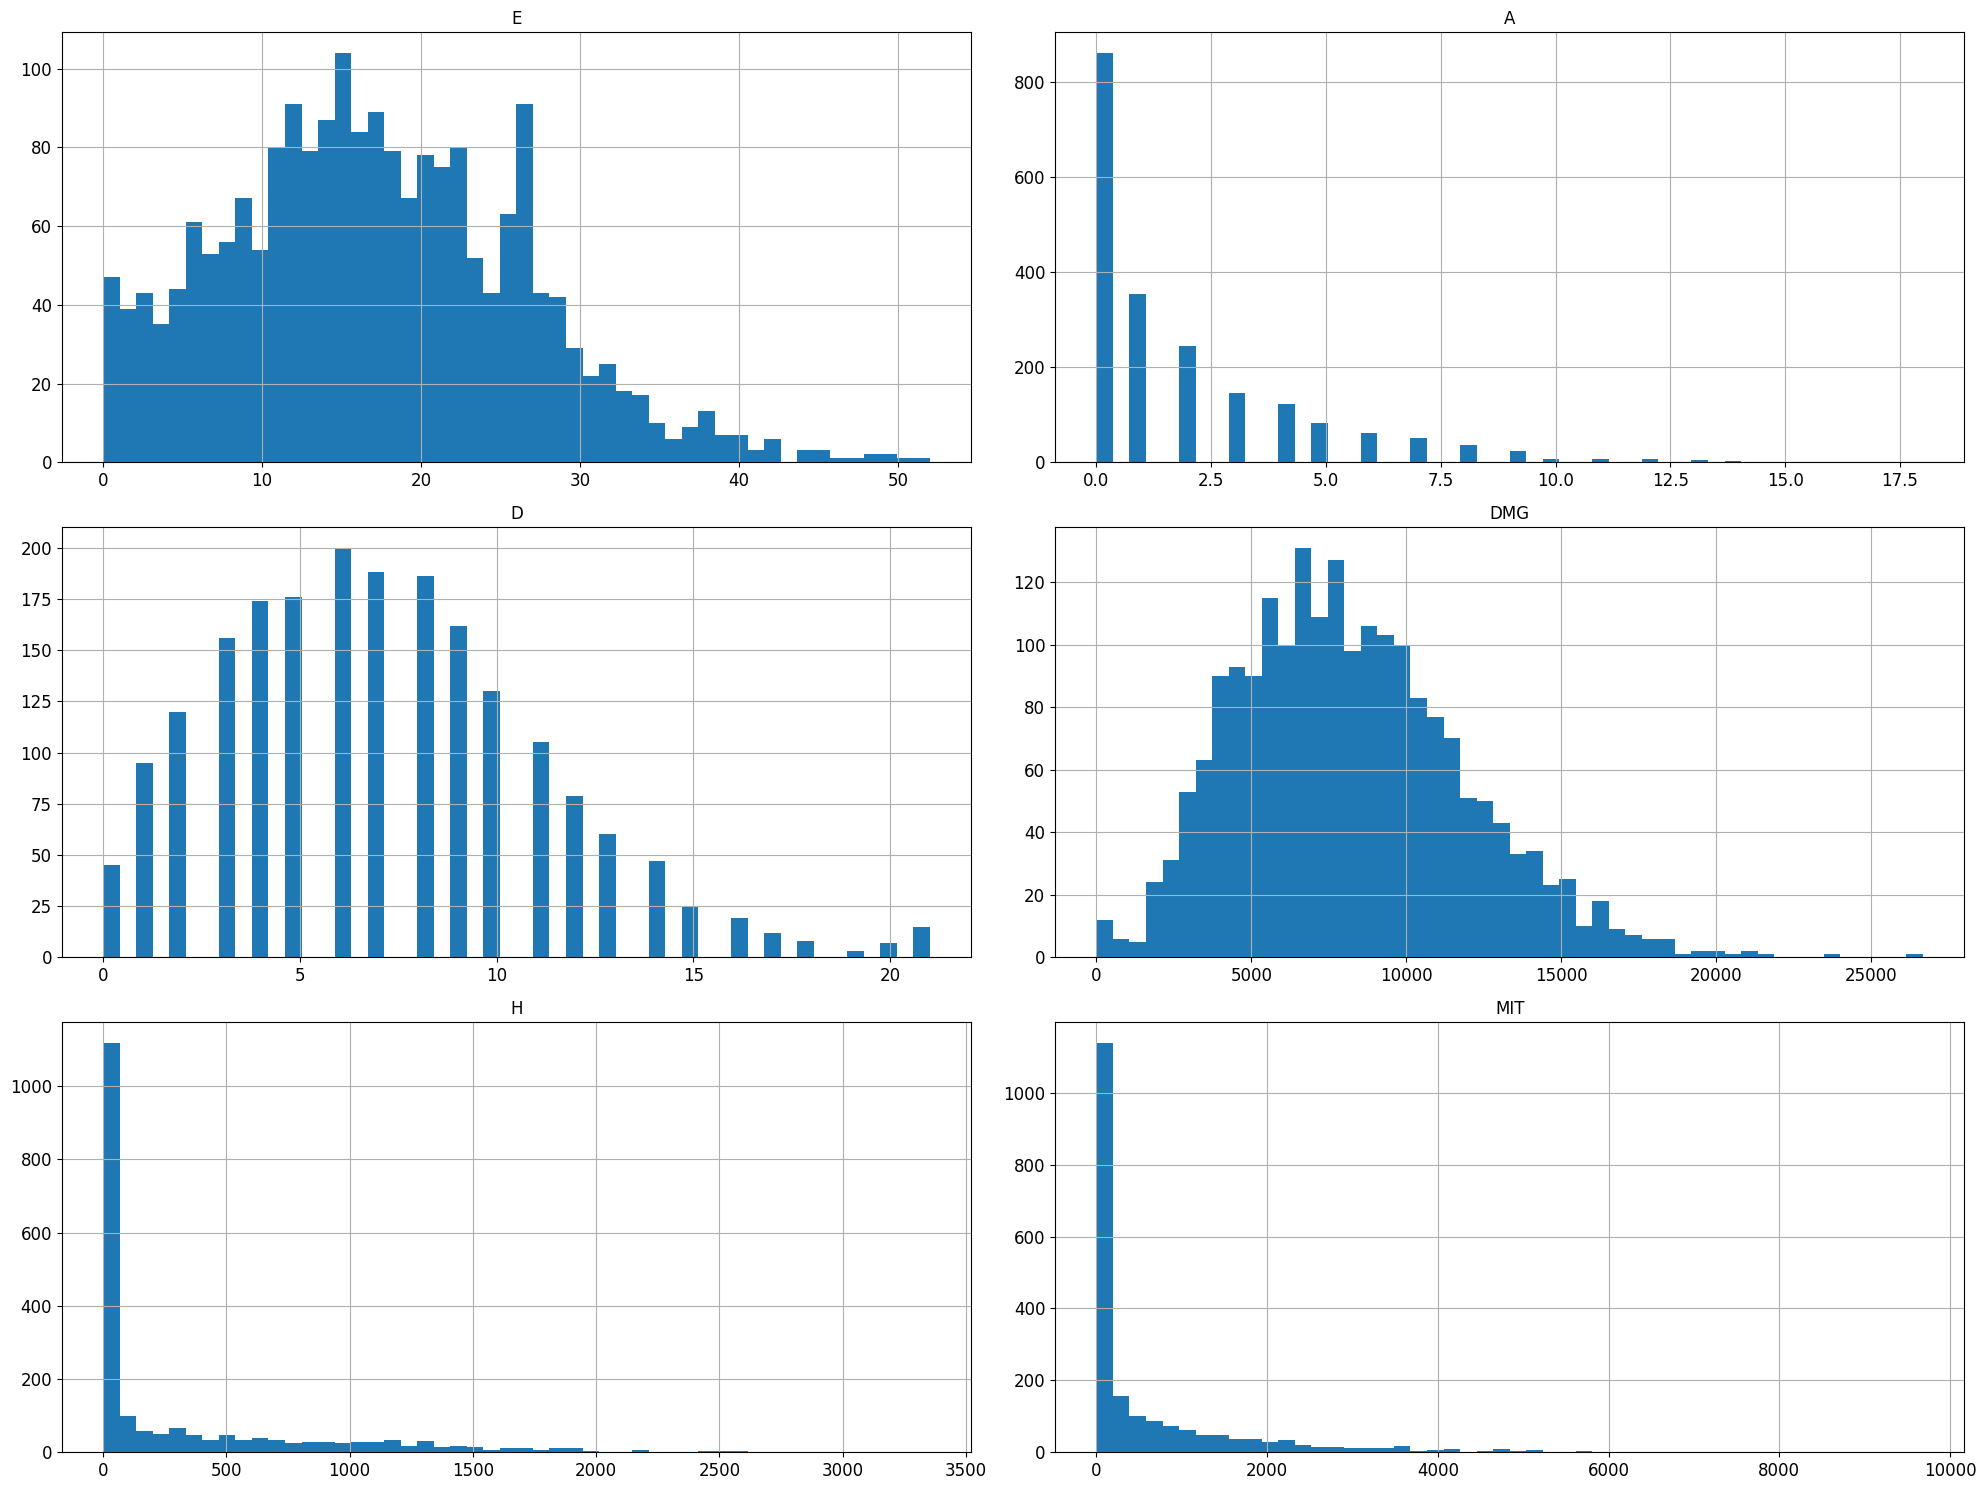

In [11]:
damage.hist(bins=50, figsize=(20, 15))
save_fig('damage_hist')
plt.show()

그림 저장:support_hist


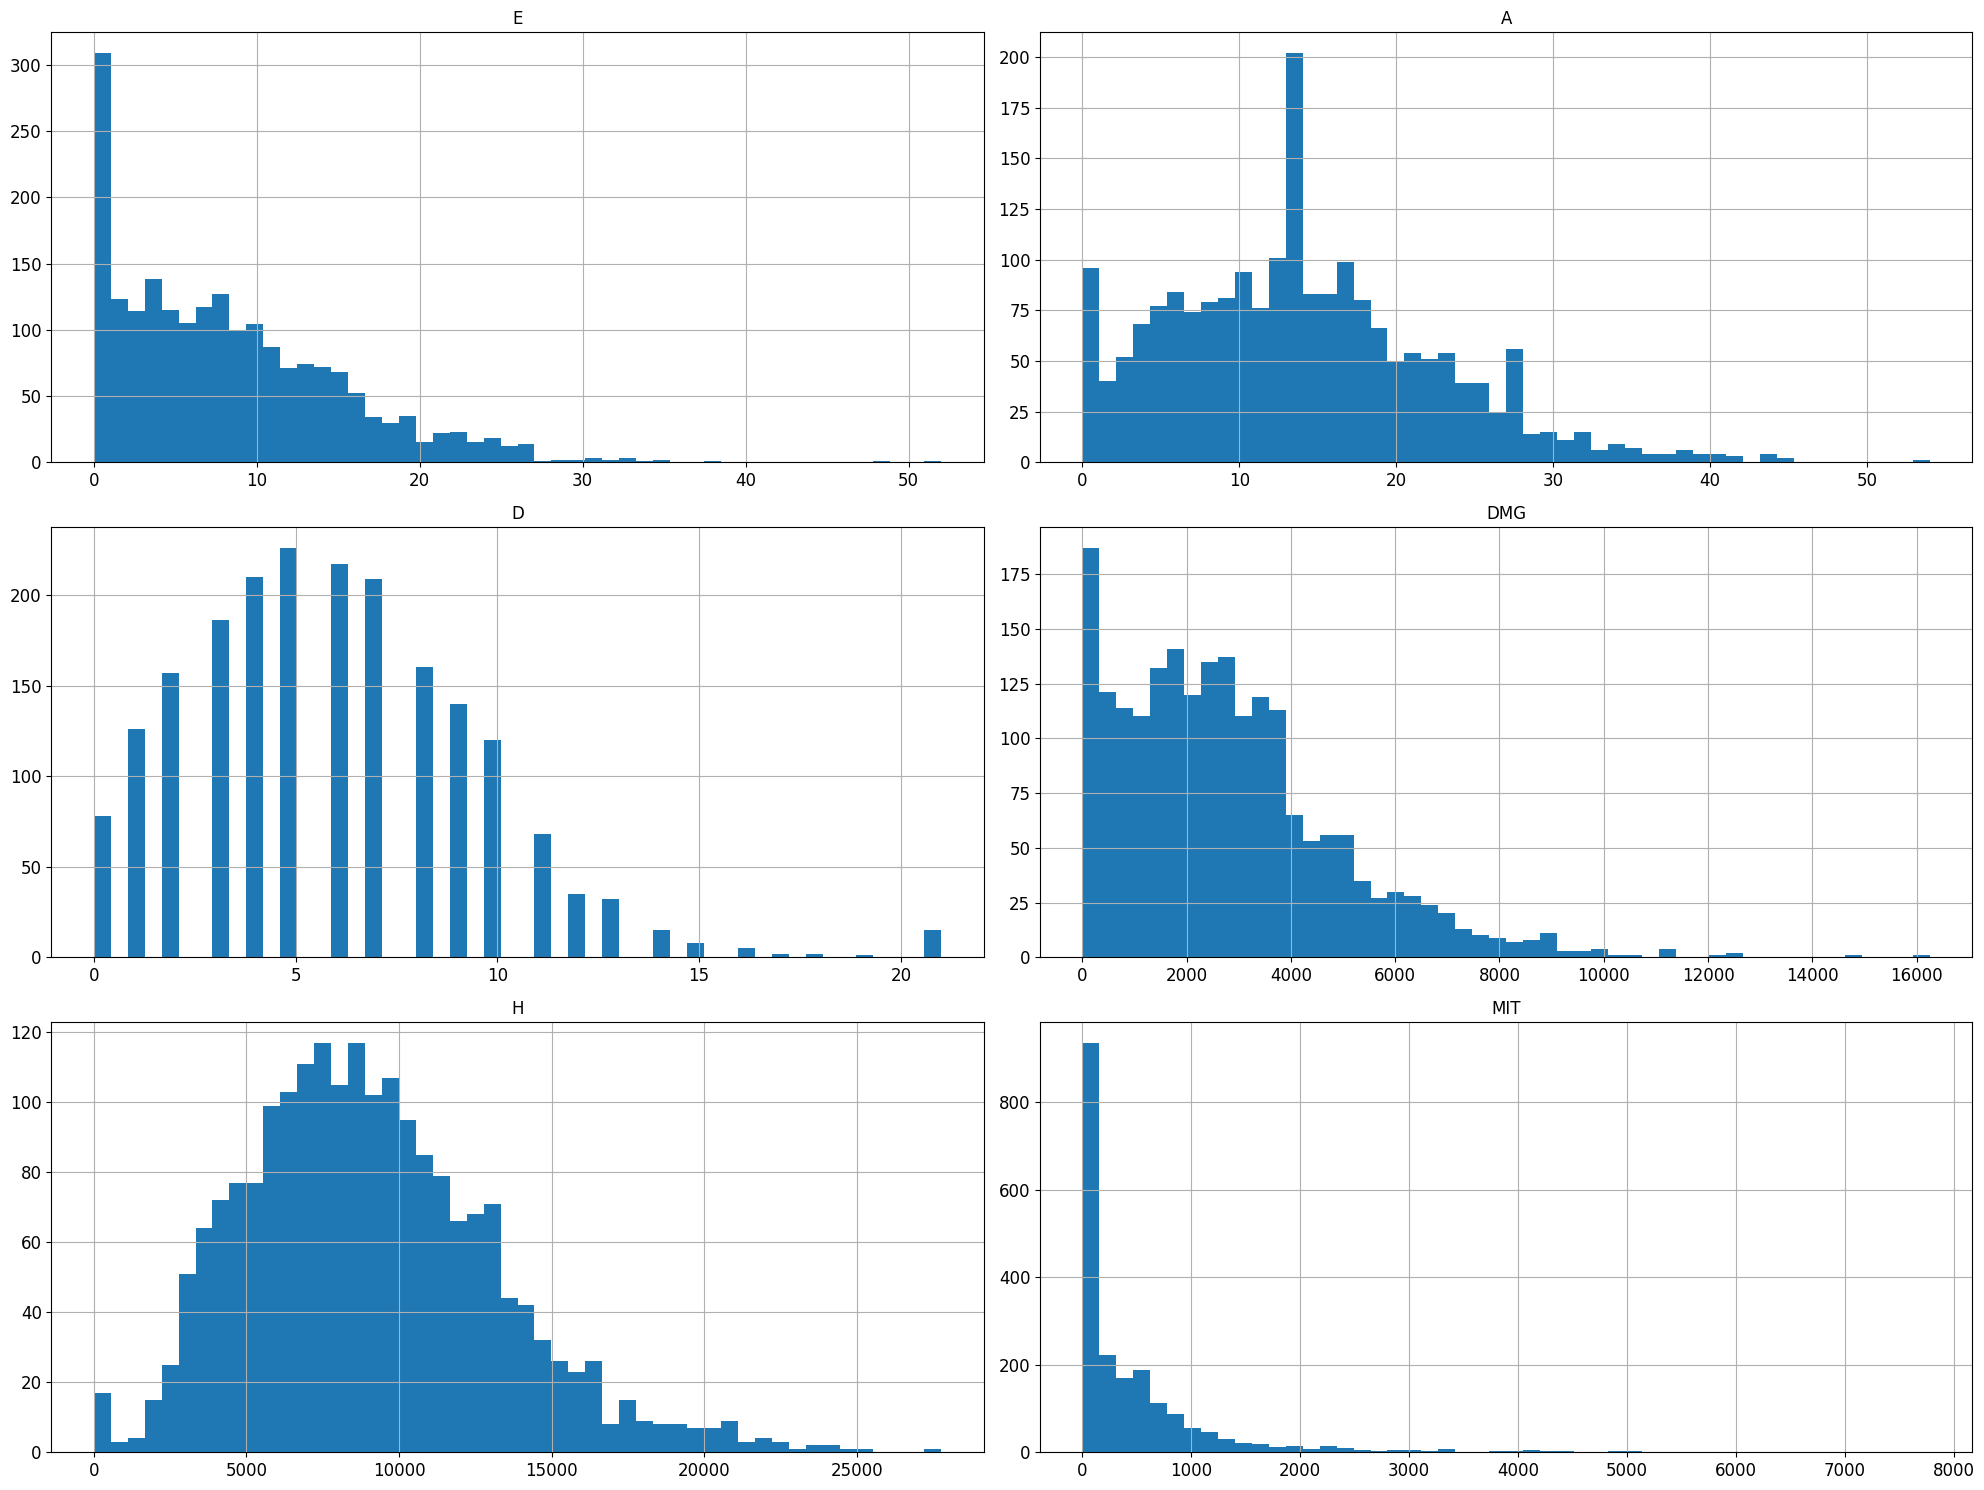

In [12]:
support.hist(bins=50, figsize=(20, 15))
save_fig('support_hist')
plt.show()

In [13]:
from sklearn import utils

scoreboards = scoreboards.loc[utils.shuffle(range(len(scoreboards.index) // players))]
scoreboards

E   A   D    DMG      H    MIT    GAME
23  0  42  16  14  20651      0  27415  DEFEAT
    1  29   4  19  18009    923   1816  DEFEAT
    2  28   1  21  18523      0   3374  DEFEAT
    3  18  33   9   6181  27756   1597  DEFEAT
    4   5  21  13   3717  24126   2298  DEFEAT
...    ..  ..  ..    ...    ...    ...     ...
240 5   0   0   5   3435   1919   1115  DEFEAT
    6   1   0   6   2834      0      0  DEFEAT
    7   0   0   5   1049      0     33  DEFEAT
    8   0   0   6    567   3201    617  DEFEAT
    9   0   0  21      0      0      0  DEFEAT

[5030 rows x 7 columns]

In [14]:
X = scoreboards.drop('GAME', axis=1)
y = scoreboards['GAME'][::players].copy()

In [15]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler().fit(X)
joblib.dump(scaler, 'scaler.joblib')
X = pd.DataFrame(scaler.transform(X), X.index, X.columns)
X

E         A         D       DMG         H       MIT
23  0  0.724138  0.296296  0.666667  0.774432  0.000000  0.655093
    1  0.500000  0.074074  0.904762  0.675354  0.033254  0.043394
    2  0.482759  0.018519  1.000000  0.694630  0.000000  0.080623
    3  0.310345  0.611111  0.428571  0.231793  1.000000  0.038161
    4  0.086207  0.388889  0.619048  0.139391  0.869217  0.054912
...         ...       ...       ...       ...       ...       ...
240 5  0.000000  0.000000  0.238095  0.128816  0.069138  0.026643
    6  0.017241  0.000000  0.285714  0.106278  0.000000  0.000000
    7  0.000000  0.000000  0.238095  0.039338  0.000000  0.000789
    8  0.000000  0.000000  0.285714  0.021263  0.115326  0.014743
    9  0.000000  0.000000  1.000000  0.000000  0.000000  0.000000

[5030 rows x 6 columns]

In [16]:
features = X.shape[-1]
total_features = players * features
X = X.values.reshape(-1, total_features)
print(X.shape)
print(y.shape)

(503, 60)
(503,)


In [17]:
from sklearn import model_selection, linear_model

cv_iter = 1600
model_selection.cross_val_score(linear_model.LogisticRegressionCV(max_iter=cv_iter), X, y)

array([0.89108911, 0.94059406, 0.91089109, 0.9       , 0.89      ])

In [18]:
from sklearn import neighbors

radius = 2.
model_selection.cross_val_score(neighbors.RadiusNeighborsClassifier(radius), X, y)

array([0.54455446, 0.6039604 , 0.54455446, 0.55      , 0.55      ])

In [19]:
from sklearn import neural_network

classifier_iter = 3200
model_selection.cross_val_score(neural_network.MLPClassifier(max_iter=classifier_iter), X, y)

array([0.93069307, 0.94059406, 0.88118812, 0.9       , 0.89      ])

In [20]:
from sklearn import ensemble, svm, tree
import operator

estimators = (
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(n_jobs=-1),
    ensemble.ExtraTreesClassifier(n_jobs=-1),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(n_jobs=-1),
    ensemble.HistGradientBoostingClassifier(),
    linear_model.LogisticRegression(n_jobs=-1),
    linear_model.LogisticRegressionCV(max_iter=cv_iter, n_jobs=-1),
    linear_model.PassiveAggressiveClassifier(n_jobs=-1),
    linear_model.Perceptron(n_jobs=-1),
    linear_model.RidgeClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(n_jobs=-1),
    neighbors.KNeighborsClassifier(n_jobs=-1),
    neighbors.RadiusNeighborsClassifier(radius, n_jobs=-1),
    neighbors.NearestCentroid(),
    neural_network.MLPClassifier(max_iter=classifier_iter),
    svm.LinearSVC(dual='auto'),
    svm.NuSVC(),
    svm.SVC(),
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier()
)
scores = [(estimator, model_selection.cross_val_score(estimator, X, y, n_jobs=-1).mean()) for estimator in estimators]
scores.sort(key=operator.itemgetter(1), reverse=True)
scores

[(ExtraTreesClassifier(n_jobs=-1), 0.9065346534653465),
 (LogisticRegression(n_jobs=-1), 0.9065148514851484),
 (LogisticRegressionCV(max_iter=1600, n_jobs=-1), 0.9065148514851484),
 (NuSVC(), 0.9045544554455447),
 (MLPClassifier(max_iter=3200), 0.9025346534653466),
 (RidgeClassifierCV(), 0.9025148514851484),
 (LinearSVC(dual='auto'), 0.9005742574257425),
 (NearestCentroid(), 0.9005544554455446),
 (RidgeClassifier(), 0.9005346534653464),
 (SVC(), 0.8965940594059406),
 (RandomForestClassifier(n_jobs=-1), 0.8906138613861385),
 (GradientBoostingClassifier(), 0.8866138613861386),
 (SGDClassifier(n_jobs=-1), 0.8806534653465347),
 (AdaBoostClassifier(), 0.8747524752475249),
 (KNeighborsClassifier(n_jobs=-1), 0.8747128712871287),
 (HistGradientBoostingClassifier(), 0.8746930693069308),
 (BaggingClassifier(n_jobs=-1), 0.8487722772277226),
 (PassiveAggressiveClassifier(n_jobs=-1), 0.8391089108910892),
 (DecisionTreeClassifier(), 0.8091683168316832),
 (Perceptron(n_jobs=-1), 0.8091089108910892),


In [21]:
defeats = len(defeat) // players


def find_file(index):
    index += 1
    if index <= defeats:
        return f'DEFEAT ({index})'
    else:
        index -= len(victory) // players
        return f'VICTORY ({index})'

In [22]:
for estimator, _ in scores:
    estimator = estimator.fit(X, y)
    if hasattr(estimator, 'feature_importances_'):
        importances = estimator.feature_importances_.reshape(-1, features)
        tanks, damages, supports = [0, 5], [1, 2, 6, 7], [3, 4, 8, 9]
        importances_tank = importances[tanks].sum(0)
        importances_damage = importances[damages].sum(0)
        importances_support = importances[supports].sum(0)
        importances[tanks] = importances_tank / 2
        importances[damages] = importances_damage / 4
        importances[supports] = importances_support / 4
        joblib.dump(importances, 'importances.joblib')

        titles = '처치', '도움', '죽음', '피해', '치유', '경감'

        print('\n**특성 중요도**')
        for importance, title in sorted(zip(importances.sum(0), titles), reverse=True):
            print(f'{title}: {importance:.3f}')

        print('\n**역할 중요도**')
        for importance, title in sorted(
                zip(
                    (importances_tank.sum(), importances_damage.sum(), importances_support.sum()),
                    ('돌격(2)', '공격(4)', '지원(4)')
                ),
                reverse=True
        ):
            print(f'{title}: {importance:.3f}')

        print('\n**돌격(2) 특성 중요도**')
        for importance, title in sorted(zip(importances_tank, titles), reverse=True):
            print(f'{title}: {importance:.3f}')

        print('\n**공격(4) 특성 중요도**')
        for importance, title in sorted(zip(importances_damage, titles), reverse=True):
            print(f'{title}: {importance:.3f}')

        print('\n**지원(4) 특성 중요도**')
        for importance, title in sorted(zip(importances_support, titles), reverse=True):
            print(f'{title}: {importance:.3f}')

        break

ExtraTreesClassifier(n_jobs=-1)

**특성 중요도**
처치: 0.304
죽음: 0.281
도움: 0.191
피해: 0.091
치유: 0.068
경감: 0.065

**역할 중요도**
지원(4): 0.373
공격(4): 0.370
돌격(2): 0.257

**돌격(2) 특성 중요도**
죽음: 0.089
처치: 0.083
도움: 0.040
피해: 0.020
경감: 0.014
치유: 0.010

**공격(4) 특성 중요도**
처치: 0.153
죽음: 0.093
피해: 0.041
도움: 0.035
치유: 0.026
경감: 0.023

**지원(4) 특성 중요도**
도움: 0.115
죽음: 0.099
처치: 0.069
치유: 0.032
피해: 0.030
경감: 0.028


In [23]:
defeats = defeat.index.stop
for i in range(defeats - 10, defeats - 101, -players):
    defeat_i = defeat[i:i + players]
    print(f'DEFEAT ({i // players + 1})')
    print(defeat_i)
    contributions = scaler.transform(defeat_i.drop(['GAME'], axis=1))
    contributions[:, 2] = 1 - contributions[:, 2]
    contributions *= importances
    contributions = contributions.sum(1)
    contributions[tanks] *= 2 / contributions[tanks].sum()
    contributions[damages] *= 4 / contributions[damages].sum()
    contributions[supports] *= 4 / contributions[supports].sum()
    print(f'TEAM 1:', end='')
    for contribution in contributions[:5]:
        print(f' {contribution:.1f}', end='')
    print(f'\nTEAM 2:', end='')
    for contribution in contributions[5:]:
        print(f' {contribution:.1f}', end='')
    print('\n')

DEFEAT (231)
       E   A   D   DMG     H    MIT     GAME
2300  16   4   7  7182     0  14093   DEFEAT
2301  24   1   5  8965     0     72   DEFEAT
2302  11   0  12  5403     0    755   DEFEAT
2303   7  12   5  2406  7570     75   DEFEAT
2304  11  10   2  4623  6583      0   DEFEAT
2305  16   3   7  9118   428   4919  VICTORY
2306  15   0   6  5408   191    892  VICTORY
2307  15   4   8  6356     0      0  VICTORY
2308   9  13   4  2317  9277   6168  VICTORY
2309  13  11   5  1751  6605    519  VICTORY
TEAM 1: 1.0 1.3 0.7 0.9 1.1
TEAM 2: 1.0 1.0 1.0 1.1 1.0

DEFEAT (230)
       E   A  D   DMG     H    MIT     GAME
2290   6   1  4  7742     0  10594   DEFEAT
2291   3   0  7  4517     0    470   DEFEAT
2292   3   0  6  3986     0      0   DEFEAT
2293   3   2  7  2233  3570      0   DEFEAT
2294   4   6  4   751  7897    185   DEFEAT
2295  18   3  1  7212     0   5433  VICTORY
2296  17   3  5  3559   410      0  VICTORY
2297  16   0  1  5585   478    150  VICTORY
2298  12  16  2  3503  606

In [24]:
victorys = victory.index.stop
for i in range(victorys - 10, victorys - 101, -players):
    victory_i = victory[i:i + players]
    print(f'VICTORY ({i // players + 1})')
    print(victory_i)
    contributions = scaler.transform(victory_i.drop(['GAME'], axis=1))
    contributions[:, 2] = 1 - contributions[:, 2]
    contributions *= importances
    contributions = contributions.sum(1)
    contributions[tanks] *= 2 / contributions[tanks].sum()
    contributions[damages] *= 4 / contributions[damages].sum()
    contributions[supports] *= 4 / contributions[supports].sum()
    print(f'TEAM 1:', end='')
    for contribution in contributions[:5]:
        print(f' {contribution:.1f}', end='')
    print(f'\nTEAM 2:', end='')
    for contribution in contributions[5:]:
        print(f' {contribution:.1f}', end='')
    print('\n')

VICTORY (272)
       E   A  D   DMG     H   MIT     GAME
2710  17   2  0  5542     0  5559  VICTORY
2711  17   0  2  5645     0     0  VICTORY
2712  11   0  3  3148     0    75  VICTORY
2713  10  14  0  2249  5298   222  VICTORY
2714   9  12  0  2693  4857     0  VICTORY
2715   0   0  5  3863     0  2952   DEFEAT
2716   3   1  3  2456   517   488   DEFEAT
2717   1   0  5  2199     0     0   DEFEAT
2718   3   0  6  3338  3806     0   DEFEAT
2719   0   1  7  1020  2733   796   DEFEAT
TEAM 1: 1.3 1.3 1.1 1.3 1.3
TEAM 2: 0.7 0.9 0.7 0.7 0.7

VICTORY (271)
       E   A   D    DMG      H    MIT     GAME
2700  27   5   4  12845      0  20409  VICTORY
2701  28   2   6  13300    886    352  VICTORY
2702  34   0   8  10491      0      0  VICTORY
2703   7  22   3   4155  10232      0  VICTORY
2704   5  23   3   1144   9497    750  VICTORY
2705   6   1   8   8117   1421  12787   DEFEAT
2706  12   1  11  12026    283   1146   DEFEAT
2707  12   2  10   8051    717    200   DEFEAT
2708   3   8   6   

In [25]:
from tensorflow.keras import backend, layers
from tensorflow import keras

backend.clear_session()
model = keras.Sequential()
model.add(layers.Dense(300, 'relu', input_shape=(total_features,)))
model.add(layers.Dense(100, 'relu'))
model.add(layers.Dense(1, 'sigmoid'))
model.summary()

2023-12-11 13:51:33.792779: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-11 13:51:37.150607: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-11 13:51:37.398069: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-11 13:51:37.398322: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been bu

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               18300     
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 48501 (189.46 KB)
Trainable params: 48501 (189.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
from tensorflow.keras import optimizers, callbacks

model.compile('sgd', 'binary_crossentropy', ['accuracy'])
transform = preprocessing.LabelEncoder().fit_transform(y)
stopping = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(
    X,
    transform,
    epochs=256,
    callbacks=[stopping],
    validation_split=.25
)
history.history['val_loss'][-11], history.history['val_accuracy'][-11]

Epoch 1/256


2023-12-11 13:51:38.577026: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-12-11 13:51:38.714253: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f6748c12be0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-11 13:51:38.714296: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2023-12-11 13:51:38.848656: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2023-12-11 13:51:39.108687: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-11 13:51:39.294443: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


12/12 [==============================] - 2s 15ms/step - loss: 0.6894 - accuracy: 0.5385 - val_loss: 0.6795 - val_accuracy: 0.5952
Epoch 2/256
12/12 [==============================] - 0s 6ms/step - loss: 0.6826 - accuracy: 0.5385 - val_loss: 0.6719 - val_accuracy: 0.6032
Epoch 3/256
12/12 [==============================] - 0s 5ms/step - loss: 0.6763 - accuracy: 0.5703 - val_loss: 0.6645 - val_accuracy: 0.6111
Epoch 4/256
12/12 [==============================] - 0s 6ms/step - loss: 0.6702 - accuracy: 0.5995 - val_loss: 0.6575 - val_accuracy: 0.6111
Epoch 5/256
12/12 [==============================] - 0s 5ms/step - loss: 0.6642 - accuracy: 0.6074 - val_loss: 0.6510 - val_accuracy: 0.6429
Epoch 6/256
12/12 [==============================] - 0s 6ms/step - loss: 0.6582 - accuracy: 0.6578 - val_loss: 0.6443 - val_accuracy: 0.7381
Epoch 7/256
12/12 [==============================] - 0s 6ms/step - loss: 0.6521 - accuracy: 0.7003 - val_loss: 0.6378 - val_accuracy: 0.7698
Epoch 8/256
12/12 [=====

(0.25020915269851685, 0.89682537317276)